In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from imageio import imread
from matplotlib.pyplot import imshow

In [2]:
# Load and preprocess the data
train_data_dir = 'dataset/train/'
test_data_dir = 'dataset/test/'
input_size = (224, 224)  # VGG16 input size

In [3]:
# Use data augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_size,
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_size,
    batch_size=32,
    class_mode='binary'
)

Found 370 images belonging to 2 classes.
Found 209 images belonging to 2 classes.


In [4]:
# Define the model using VGG16 as the base
def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation
    return model

In [5]:
# Build the model
model = create_model()

In [6]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)

Epoch 1/10


C:\ProgramData\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/11 [==============================] - 309s 28s/step - loss: 0.3133 - accuracy: 0.8077 - val_loss: 0.1106 - val_accuracy: 0.9531
Epoch 2/10
11/11 [==============================] - 286s 26s/step - loss: 0.0403 - accuracy: 0.9822 - val_loss: 0.1359 - val_accuracy: 0.9375
Epoch 3/10
11/11 [==============================] - 302s 28s/step - loss: 0.0231 - accuracy: 0.9970 - val_loss: 0.5783 - val_accuracy: 0.8906
Epoch 4/10
11/11 [==============================] - 301s 27s/step - loss: 0.0913 - accuracy: 0.9763 - val_loss: 0.2254 - val_accuracy: 0.9531
Epoch 5/10
11/11 [==============================] - 272s 25s/step - loss: 0.0904 - accuracy: 0.9734 - val_loss: 0.4178 - val_accuracy: 0.9115
Epoch 6/10
11/11 [==============================] - 262s 24s/step - loss: 0.0496 - accuracy: 0.9734 - val_loss: 0.2068 - val_accuracy: 0.9115
Epoch 7/10
11/11 [==============================] - 271s 25s/step - loss: 0.0237 - accuracy: 0.9915 - val_loss: 0.2433 - val_accuracy: 0.9375
Epoch 8/10
11/11 

In [8]:
# Evaluate the model
scores = model.evaluate(test_generator, steps=test_generator.n // test_generator.batch_size, verbose=0)
print("Car vs. bike Detection Accuracy: %.2f%%" % (scores[1] * 100))

Car vs. bike Detection Accuracy: 94.79%


C:\Users\niazi\AppData\Local\Temp\ipykernel_9016\3616417647.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  a = imread(test_image_path)


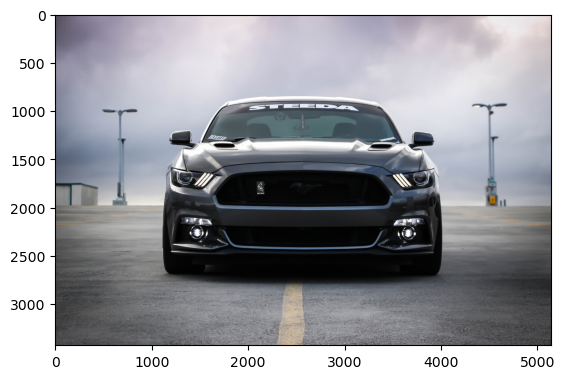

In [10]:
test_image_path = 'testimages/car6.jpg'
a = imread(test_image_path)
imshow(a)

In [11]:
# Load and preprocess the test image

test_image = load_img(test_image_path, target_size=(224, 224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the pixel values

# Predict the class of the test image
prediction = model.predict(test_image)
if prediction[0][0] < 0.5:
    print("Predicted: Car")
else:
    print("Predicted: Bike")

1/1 [==============================] - 0s 423ms/step
Predicted: Car
